In [3]:
import numpy as np
from math import sin, cos, pi, factorial, exp, tan
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from numba import jit

In [4]:
#@jit
def LagrangeInterpolation(point, X, Y):
    xp = point
    yp = 0
    n = X.shape[0]
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - X[j])/(X[i] - X[j])
        yp = yp + p * Y[i]
        
    return yp

In [5]:
function = '(2+x**2+10*cos(x))/(10+x)'
n = 10
a = 0
b = 10
def Function(x):
    function = '(2+x**2+10*cos(x))/(10+x)'
    return eval(function)

Для равномерного распределения интерполяционных узлов

In [6]:
F = np.zeros(n, dtype=np.float64)
X = np.linspace(a, b, num = n)
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [59]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 6.68509588232438e-10


Для Чебышевского распределения интерполяционных узлов

In [7]:
F = np.zeros(n, dtype=np.float64)
X = np.zeros(n, dtype=np.float64)
for k in range(0, 2 * n, 2):
    X[int(k/2)] = (a + b) / 2 + (b - a) / 2 * cos((2 * k - 1)/(2 * n) * pi)
X.sort()
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [8]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
Rn = np.zeros(n, dtype=np.float64)
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 0.0006457386579318303


In [9]:
Rn = np.abs(iF - newF)
Rn

array([1.35873139e-01, 6.49144892e-04, 5.13393314e-04, 6.63761481e-04,
       3.15387247e-04, 3.48630793e-04, 9.01305941e-04, 8.70830934e-04,
       1.41956400e-03, 4.04472818e-01])

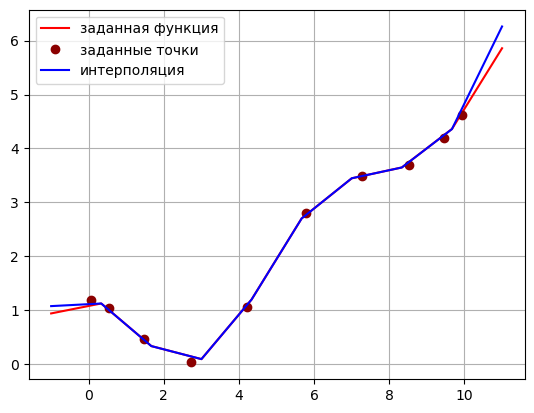

<Figure size 50000x50000 with 0 Axes>

In [10]:
#plt.style.use('seaborn-deep')
plt.style.use('default')
plt.plot(newX, newF, color='red', label='заданная функция')
plt.plot(X, F, color='#8b0000', marker='o', linewidth=0, label='заданные точки')
plt.plot(newX, iF, 'blue', label='интерполяция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [11]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(
                    x=newX,
                    y=newF,
                    mode='lines',
                    name='заданная функция',
                    line=dict(color='red')))
fig.add_trace(go.Scatter(
                    x=X,
                    y=F,
                    mode='markers',
                    name='заданные точки'))
fig.add_trace(go.Scatter(
                    x=newX,
                    y=iF,
                    mode='lines',
                    name='интерполяция',
                    line=dict(color='blue')))

# Edit the layout
fig.update_layout(title='Интерполяция функции по точкам',
                   xaxis_title='x',
                   yaxis_title='y')

fig.update_layout(
    width=900,
    height=600
    )

fig.show()

In [93]:
def Df(x, n, h = 0.1):
    if n == 0: return Function(x)
    if n == 1: return (Function(x + h) - Function(x - h)) / (2 * h)
    fc = (Df(x + h, n-1) - Df(x - h, n-1)) / (2 * h)
    return fc

In [139]:
def NumericalDifferentiation(function, X, x, k):
    Vfunction = np.vectorize(function)
    n = X.shape[0]
    rhs = np.array([0 if i < k else factorial(i)/factorial(i - k) * float(x)**(i - k) for i in range(n)])#, dtype=np.float64)
    matrix = np.zeros((n, n))#, dtype=np.float64)
    for i in range(n):
        for j in range(n):
            matrix[i][j] = np.power(X[j], i)
            #if i == j:
            #    matrix[i][j] += 0.00000001
    #print(np.linalg.cond(matrix))
    #print(rhs)

    C = np.linalg.lstsq(matrix, rhs, rcond=-1)[0]
    #C = np.linalg.inv(matrix).dot(rhs)
    
    Y = Vfunction(X)
    return C.dot(Y)

In [140]:
NumericalDifferentiation(lambda x: x**2, np.linspace(-8, 8, 17), -7, 1)

-13.999948763035945

In [113]:
NumericalDifferentiation(lambda x: LagrangeInterpolation(x, np.linspace(-8, 8, 17), np.power(np.linspace(-8, 8, 17), 2)), np.linspace(-8, 8, 17), -7, 1)

-13.999948763035945

In [114]:
NumericalDifferentiation(lambda x: exp(tan(x/5)), np.linspace(1, 3, 100), 2, 5)

11.02034425230196

In [115]:
np.vectorize(Function)([1,2])

array([0.76391119, 0.15321097])

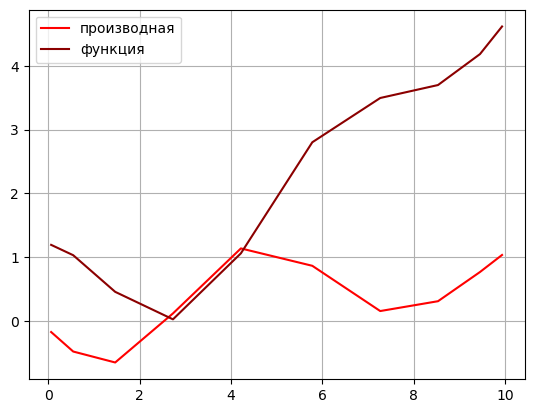

<Figure size 50000x50000 with 0 Axes>

In [116]:
dX = np.array([NumericalDifferentiation(lambda x: LagrangeInterpolation(x, X, np.vectorize(Function)(X)), X, xi, 1) for xi in X])
plt.plot(X, dX, color='red', label='производная')
plt.plot(X, F, color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

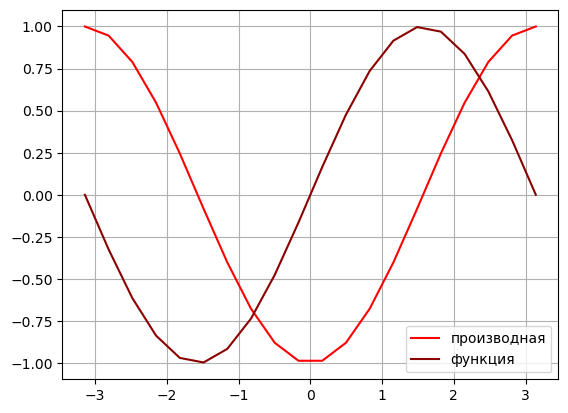

<Figure size 50000x50000 with 0 Axes>

In [117]:
XX = np.linspace(-pi, pi, 20)
dX = np.array([NumericalDifferentiation(lambda x: np.sin(x), XX, xi, 3) for xi in XX])
plt.plot(XX, dX, color='red', label='производная')
plt.plot(XX, np.sin(XX), color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

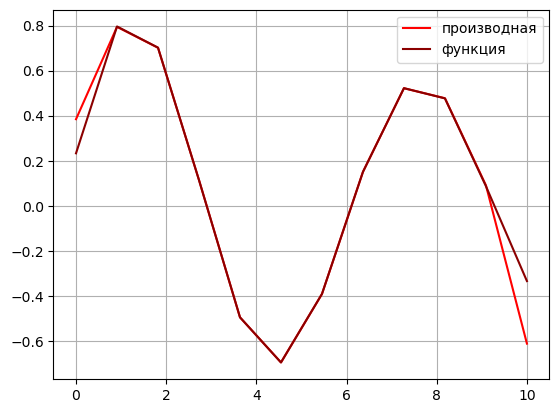

<Figure size 50000x50000 with 0 Axes>

In [118]:
XX = np.linspace(a, b, 12)
dX = np.array([NumericalDifferentiation(lambda x: (2+x**2+10*cos(x))/(10+x), XX, xi, 3) for xi in XX])
plt.plot(XX, dX, color='red', label='производная')
#plt.plot(XX, np.vectorize(lambda x: (2+x**2+10*cos(x))/(10+x))(XX), color='#8b0000', label='функция')
plt.plot(XX, np.vectorize(lambda x: -(6*(x**2 + 10*cos(x) + 2))/(10 + x)**4 + (6*(2*x - 10*sin(x)))/(10 + x)**3 + (10*sin(x))/(10 + x) - (3*(2 - 10*cos(x)))/(10 + x)**2)(XX), color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

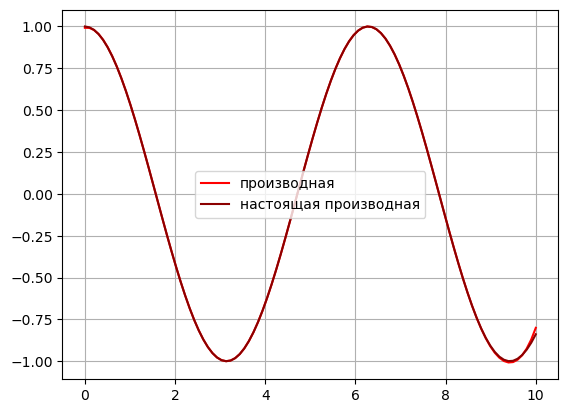

<Figure size 50000x50000 with 0 Axes>

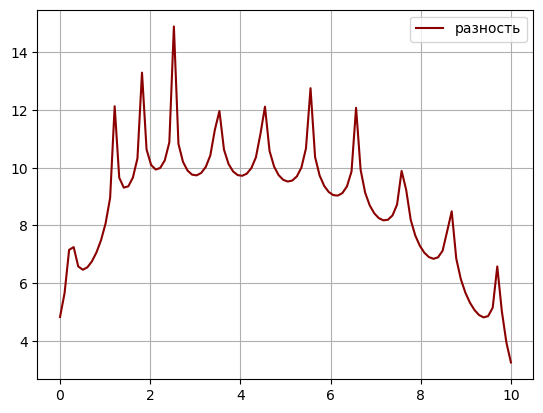

<Figure size 50000x50000 with 0 Axes>

In [138]:
XX = np.linspace(a, b, 100)

dX = np.array([NumericalDifferentiation(lambda x: sin(x), np.linspace(a, b, 11), xi, 1) for xi in XX])
plt.plot(XX, dX, color='red', label='производная')
#plt.plot(XX, np.vectorize(lambda x: (2+x**2+10*cos(x))/(10+x))(XX), color='#8b0000', label='функция')
plt.plot(XX, np.cos(XX), color='#8b0000', label='настоящая производная')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(XX, np.abs(np.log(np.abs(np.cos(XX) - dX))), color='#8b0000', label='разность')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

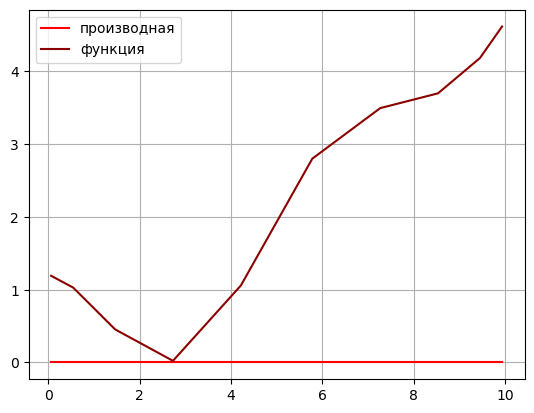

<Figure size 50000x50000 with 0 Axes>

In [89]:
dX = np.array([NumericalDifferentiation(Function, X, xi, 10) for xi in X])
plt.plot(X, dX, color='red', label='производная')
plt.plot(X, np.vectorize(Function)(X), color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [10]:
NumericalDifferentiation(lambda x: np.power(x, 7), XX, 2, 4)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01]
 [0.00000000e+00 1.00000000e+00 4.00000000e+00 9.00000000e+00
  1.60000000e+01 2.50000000e+01 3.60000000e+01 4.90000000e+01
  6.40000000e+01 8.10000000e+01 1.00000000e+02]
 [0.00000000e+00 1.00000000e+00 8.00000000e+00 2.70000000e+01
  6.40000000e+01 1.25000000e+02 2.16000000e+02 3.43000000e+02
  5.12000000e+02 7.29000000e+02 1.00000000e+03]
 [0.00000000e+00 1.00000000e+00 1.60000000e+01 8.10000000e+01
  2.56000000e+02 6.25000000e+02 1.29600000e+03 2.40100000e+03
  4.09600000e+03 6.56100000e+03 1.00000000e+04]
 [0.00000000e+00 1.00000000e+00 3.20000000e+01 2.43000000e+02
  1.02400000e+03 3.12500000e+03 7.77600000e+03 1.68070000e+04
  3.27680000e+04

6720.00009675324

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01]
 [0.00000000e+00 1.00000000e+00 4.00000000e+00 9.00000000e+00
  1.60000000e+01 2.50000000e+01 3.60000000e+01 4.90000000e+01
  6.40000000e+01 8.10000000e+01 1.00000000e+02]
 [0.00000000e+00 1.00000000e+00 8.00000000e+00 2.70000000e+01
  6.40000000e+01 1.25000000e+02 2.16000000e+02 3.43000000e+02
  5.12000000e+02 7.29000000e+02 1.00000000e+03]
 [0.00000000e+00 1.00000000e+00 1.60000000e+01 8.10000000e+01
  2.56000000e+02 6.25000000e+02 1.29600000e+03 2.40100000e+03
  4.09600000e+03 6.56100000e+03 1.00000000e+04]
 [0.00000000e+00 1.00000000e+00 3.20000000e+01 2.43000000e+02
  1.02400000e+03 3.12500000e+03 7.77600000e+03 1.68070000e+04
  3.27680000e+04

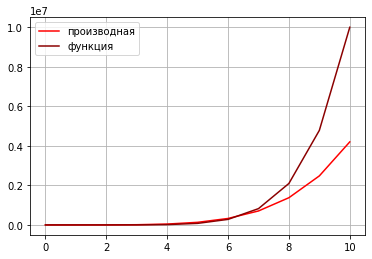

<Figure size 36000x36000 with 0 Axes>

In [9]:
XX = np.linspace(0, 10, 11)
dX = np.array([NumericalDifferentiation(lambda x: np.power(x, 7), XX, xi, 2) for xi in XX])
plt.plot(XX, dX, color='red', label='производная')
plt.plot(XX, np.power(XX, 7), color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()